In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.


# Merger Rate calculations for IMRIPY systems assuming that the DM halos are intact in the merging process.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3
t_m = 13.78e9             #in units of yr 
σ_eq = 0.005



def P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f, DM_halos_presence):
    
    if m_1 < 5 or m_2 < 5:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        beta = 0.75
        gamma  =  0.65
        delta = -0.89
        m1_ref = 1      # in units of solar mass.
        m2_ref = 1e-3   # in units of solar mass.

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1)+f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
        X = np.geomspace(X_min, X_max, 1000) 
        
        
        if DM_halos_presence == 'False':
            
            a_i_ref_nohalo =  file_nohalo['arr_0']   # in units of pc
            ji_ref_list_nohalo = file_nohalo['arr_1']
            tm_ref_list_nohalo = file_nohalo['arr_2']
            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0965*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0165*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref_nohalo)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


            check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
           
            for i, check_value in enumerate(check_value):
                if check_value < np.min(tm_ref_list_nohalo):
                    
                    check_value = np.min(tm_ref_list_nohalo)
                    m = 0.465
                    b = 33.34
                    
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(1/m))
                    
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(-(m-1)/m))
            
                else:   
                    
                    check_value = check_value
                    g =  InterpolatedUnivariateSpline(tm_ref_list_nohalo, ji_ref_list_nohalo, ext = 2, k= 2) # j_i = g(t_m)
                    g_prime = g.derivative()
                    
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return  g(check_value)
                    
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 

        
                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4108 * np.sqrt(f**2 + 1.1994 * (σ_eq**2)) * D(m_1, m_2, Δ_1, Δ_2, X) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):    
                 return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X(m_1, m_2, Δ_1, Δ_2, X)

            
           
            return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) *  (1/j_i(m_1,m_2,Δ_1,Δ_2, X)) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            
            
        
        else: 
            
            a_i_ref_halo =  file_halo['arr_0']   # in units of pc
            ji_ref_list_halo = file_halo['arr_1']
            tm_ref_list_halo = file_halo['arr_2']

            
            def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
                return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


            def C(m_1,m_2,Δ_1,Δ_2, X):
                return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref_halo)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

            
            check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
            
           
            for i, check_value in enumerate(check_value):
                if check_value < np.min(tm_ref_list_halo):
                    
                    check_value = np.min(tm_ref_list_halo)
                    m = 0.465
                    b = 33.34
                    
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(1/m))
                    
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(-(m-1)/m))
            
                else:   
                    
                    check_value = check_value
                    g =  InterpolatedUnivariateSpline(tm_ref_list_halo, ji_ref_list_halo, ext = 2, k= 2) # j_i = g(t_m)
                    g_prime = g.derivative()
                    
                    def j_i(m_1,m_2,Δ_1,Δ_2, X):
                        return  g(check_value)
                    
                    def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                        return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 

        
            
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of m_min M☉ - m_max M☉.
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            
            return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) *   (1/j_i(m_1,m_2,Δ_1,Δ_2, X))  * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            


In [3]:
m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [4]:
# Choosing the range of PBH mass function from m_min = 5 M☉ - 100 M☉.

m_1 = 15            # in units of M☉

Δ_1 = 3.74879049      # defined by choice

m_2 = 5             # in units of M☉
 
Δ_2 = 1.76383421   # defined by choice


m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-15
X_max = 1e5

X = np.geomspace(X_min, X_max, 1000) # for the PBH mass range of 5 - 100 solar mass.

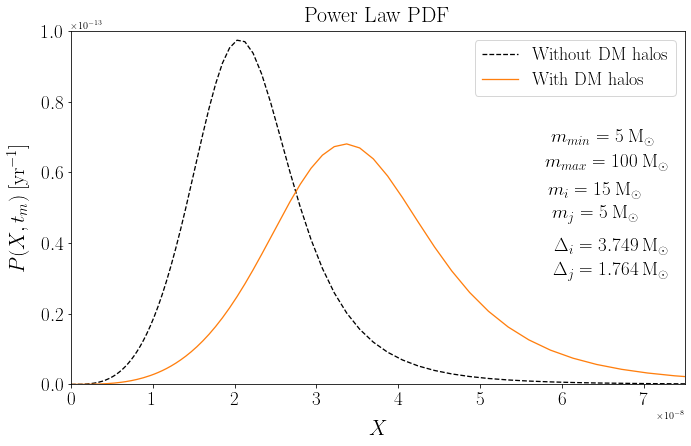

In [22]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))

file_nohalo = np.load('tm_ofj0_PWR_1.npz')
a_i_ref_nohalo =  file_nohalo['arr_0']
ji_ref_list_nohalo = file_nohalo['arr_1']
tm_ref_list_nohalo = file_nohalo['arr_2']

file_halo = np.load('tm_ofj0_PWRhalo_1.npz')
a_i_ref_halo =  file_halo['arr_0']
ji_ref_list_halo = file_halo['arr_1']
tm_ref_list_halo = file_halo['arr_2']




f_pbh_nohalo_PWR_1 = 1.18
f_pbh_halo_PWR_1 = 1.18

f_nohalo_PWR_1 = 0.85 * f_pbh_nohalo_PWR_1
f_halo_PWR_1 = 0.85 * f_pbh_halo_PWR_1       
       
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_1 , DM_halos_presence = 'False'), 'k--' )
plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_PWR_1 , DM_halos_presence = 'True'), 'C1')

#plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))



plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(0, 0.75e-7)
plt.ylim(0, 1e-13)



plt.text(6.5e-8, 7e-14, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.55e-8, 6.3e-14, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(6.4e-8, 5.5e-14, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.4e-8, 4.8e-14, "$m_{j} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(6.6e-8, 3.9e-14, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(6.6e-8, 3.2e-14, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")




plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('imPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

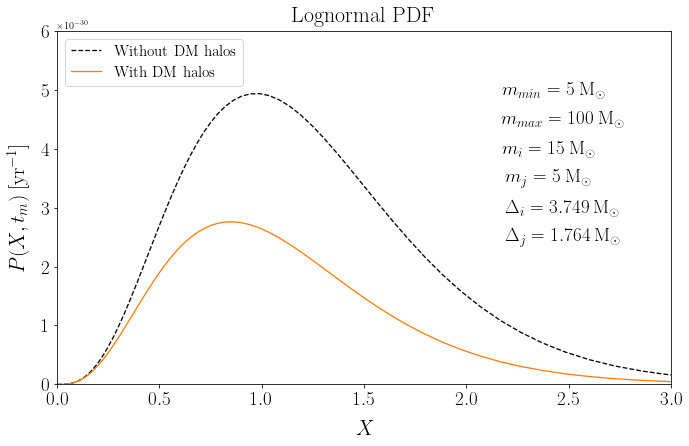

In [35]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


file_nohalo = np.load('tm_ofj0_Lgnml_1.npz')
a_i_ref_nohalo =  file_nohalo['arr_0']
ji_ref_list_nohalo = file_nohalo['arr_1']
tm_ref_list_nohalo = file_nohalo['arr_2']

file_halo = np.load('tm_ofj0_Lgnmlhalo_1.npz')
a_i_ref_halo =  file_halo['arr_0']
ji_ref_list_halo = file_halo['arr_1']
tm_ref_list_halo = file_halo['arr_2']




f_pbh_nohalo_Lognormal = 1.18
f_pbh_halo_Lognormal = 1.18

f_nohalo_Lognormal  = 0.85 * f_pbh_nohalo_Lognormal 
f_halo_Lognormal  = 0.85 * f_pbh_halo_Lognormal  


        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))



plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal,  DM_halos_presence = 'False'), 'k--' )
plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal , DM_halos_presence = 'True'), 'C1')

#plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))


plt.text(2.43, 5e-30, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.47, 4.5e-30, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.4, 4e-30, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.4, 3.5e-30, "$m_{j} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.47, 3e-30, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.47, 2.5e-30, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")



plt.xlim(0, 3)
plt.ylim(0, 6e-30)

    
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"], prop = {'size':15.3}, facecolor = 'white', fontsize=130, loc='upper left')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('imLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 

In [2]:
# Choosing the range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.
# Keeping all these values same.


m_1 = 15            # in units of M☉

Δ_1 = 3.74879049      # defined by choice

m_2 = 5             # in units of M☉
 
Δ_2 = 1.76383421   # defined by choice



m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-20
X_max = 1e5
X = np.geomspace(X_min, X_max, 1000) # for the PBH mass range of 1e-3 - 100 solar mass.

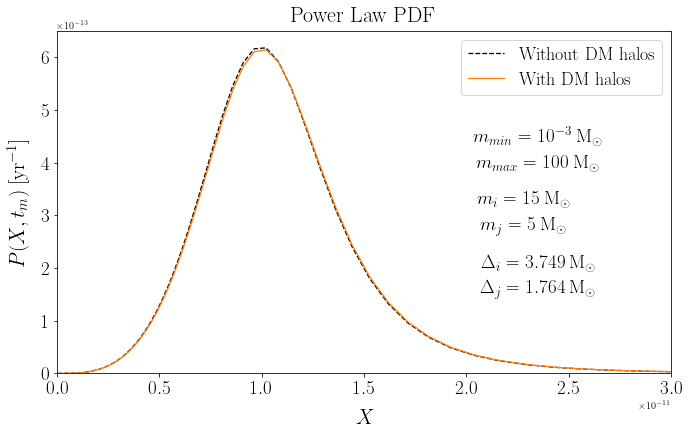

In [4]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.3))


file_nohalo = np.load('tm_ofj0_PWR_2.npz')
a_i_ref_nohalo =  file_nohalo['arr_0']
ji_ref_list_nohalo = file_nohalo['arr_1']
tm_ref_list_nohalo = file_nohalo['arr_2']

file_halo = np.load('tm_ofj0_PWRhalo_2.npz')
a_i_ref_halo =  file_halo['arr_0']
ji_ref_list_halo = file_halo['arr_1']
tm_ref_list_halo = file_halo['arr_2']


f_pbh_nohalo_PWR_2  = 1.18
f_pbh_halo_PWR_2    = 1.18

f_nohalo_PWR_2 = 0.85 * f_pbh_nohalo_PWR_2
f_halo_PWR_2   = 0.85 * f_pbh_halo_PWR_2       
    
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_2,  DM_halos_presence = 'False'), 'k--')
plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_PWR_2,  DM_halos_presence = 'True'), 'C1')

#plt.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

plt.text(2.35e-11, 4.5e-13, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.35e-11, 4e-13, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.28e-11, 3.3e-13, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.28e-11, 2.8e-13, "$m_{j} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.35e-11, 2.1e-13, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.35e-11, 1.6e-13, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")




plt.xlim(0, 3e-11)
plt.ylim(0, 6.5e-13)
plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["Without DM halos","With DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2imPWRP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show()

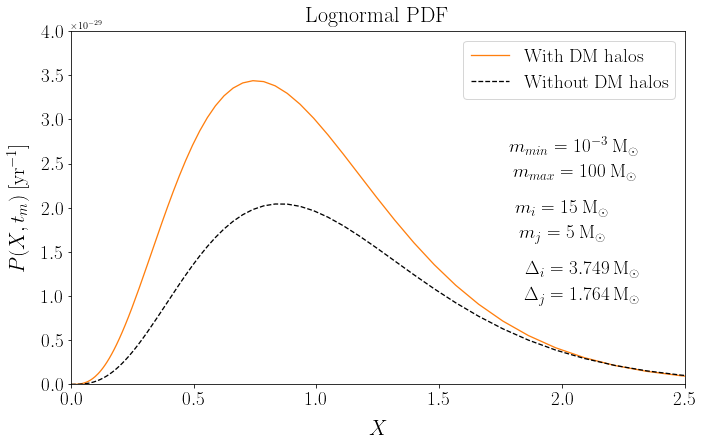

In [5]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))


file_nohalo = np.load('tm_ofj0_Lgnml_2.npz')
a_i_ref_nohalo =  file_nohalo['arr_0']
ji_ref_list_nohalo = file_nohalo['arr_1']
tm_ref_list_nohalo = file_nohalo['arr_2']

file_halo = np.load('tm_ofj0_Lgnmlhalo_2.npz')
a_i_ref_halo =  file_halo['arr_0']
ji_ref_list_halo = file_halo['arr_1']
tm_ref_list_halo = file_halo['arr_2']




f_pbh_nohalo_Lognormal = 1.18
f_pbh_halo_Lognormal = 1.18

f_nohalo_Lognormal  = 0.85 * f_pbh_nohalo_Lognormal 
f_halo_Lognormal  = 0.85 * f_pbh_halo_Lognormal  


        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))


plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_halo_Lognormal , DM_halos_presence = 'True'), 'C1')
plt.plot(X, P_X_tm_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, X, f_nohalo_Lognormal,  DM_halos_presence = 'False'), 'k--' )


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-4,-4))

plt.text(2.05, 2.7e-29, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.05, 2.4e-29, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2, 2e-29, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2, 1.7e-29, "$m_{j} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.08, 1.3e-29, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.08, 1e-29, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")




plt.xlim(0, 2.5)
plt.ylim(0, 4e-29)   


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
plt.legend(["With DM halos","Without DM halos"], prop = {'size':19}, facecolor = 'white', fontsize=110, loc='upper right')
plt.title('Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('2imLgnmlP_X_t_mvsX.pdf', bbox_inches = 'tight')
plt.show() 